1. Variables in the dataset categories 
a.Nominal category : categorical data that has no inherent order (e.g. gender, color, etc.) 
b.Binary category  : categorical data that has only two possible values (e.g. yes/no, true/false, etc.)
c.Discrete category : categorical data that has a countable number of distinct values (e.g. number of child)
d.Continuous category : numerical data that can take any value within a range (e.g. height, weight) 


2. To find number of Null Values for each columns 

a.Load dataset 
b.Check for null values in each columns 
c.Print result 

In [2]:
import pandas as pd

df = pd.read_csv('heart_dataset.csv')

null_values = df.isnull().sum()

print(null_values)


sbp          28
tobacco      40
ldl          39
adiposity    40
famhist      45
typea        41
obesity      40
alcohol      40
age          35
chd          39
dtype: int64


3.Descriptive Analysis 

3.1 General descriptive statistics by using describe function

In [10]:
descriptive_stats = df.describe()

print("Descriptive Statistics :\n",descriptive_stats)

Descriptive Statistics :
               sbp     tobacco         ldl   adiposity       typea     obesity  \
count  384.000000  372.000000  373.000000  372.000000  371.000000  372.000000   
mean   139.216146    3.676425    4.569303   25.210753   52.008086   25.763602   
std     20.307368    4.568564    1.888691    7.760257    9.822888    3.854265   
min    101.000000    0.000000    0.980000    7.120000   20.000000   17.890000   
25%    124.000000    0.057500    3.240000   19.307500   46.000000   22.835000   
50%    136.000000    1.800000    4.220000   26.115000   52.000000   25.675000   
75%    148.500000    5.640000    5.470000   30.790000   58.000000   28.167500   
max    218.000000   27.400000   14.160000   42.490000   73.000000   40.340000   

          alcohol         age         chd  
count  372.000000  377.000000  373.000000  
mean    18.425134   42.453581    0.335121  
std     25.971090   15.312649    0.472667  
min      0.000000   15.000000    0.000000  
25%      0.195000   30.0

3.2 Age of the oldest person and  the people with that age

In [15]:
oldest_person_age = df['age'].max()
people_of_oldest_age = df[df['age'] == oldest_person_age]
print("oldest_person_age : ", oldest_person_age)
print("people_of_oldest_age :\n ", people_of_oldest_age)


oldest_person_age :  64.0
people_of_oldest_age :
         sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol   age  \
58   158.0     3.60  2.97        NaN   Absent    NaN    26.64   108.00  64.0   
70   152.0    12.18  4.04      37.83  Present   63.0    34.57     4.17  64.0   
110  126.0     0.00  5.98      29.06  Present   56.0    25.39    11.52  64.0   
167  148.0     8.20  7.75      34.46  Present   46.0    26.53     6.04  64.0   
170  128.0     5.16  4.90        NaN  Present   57.0    26.42     0.00  64.0   
206    NaN     8.60  3.90      32.16  Present   52.0    28.51    11.11  64.0   
241  160.0     0.60  6.94      30.53   Absent   36.0    25.68     1.42  64.0   
256  138.0     2.00  5.11      31.40  Present   49.0    27.25     2.06  64.0   
276  128.0     0.73  3.97      23.52   Absent    NaN    23.81      NaN  64.0   
348  140.0     8.60  3.90      32.16  Present   52.0    28.51    11.11  64.0   
374  160.0     0.60  6.94      30.53   Absent   36.0    25.68      Na

3.3 Age of youngest person and  the people with that age

In [16]:
youngest_person_age = df['age'].min()
people_of_youngest_age = df[df['age'] == youngest_person_age]
print("youngest_person_age : ", youngest_person_age)
print("people_of_youngest_age :\n ", people_of_youngest_age)

youngest_person_age :  15.0
people_of_youngest_age :
        sbp  tobacco   ldl  adiposity famhist  typea  obesity  alcohol   age  \
9   132.0      0.0  1.87      17.21  Absent   49.0    23.63     0.97  15.0   
38    NaN      0.0  3.67      12.13  Absent    NaN    19.15     0.60  15.0   

    chd  
9   0.0  
38  0.0  


3.4 Average and standard deviation of age column 

In [21]:
average_age = df['age'].mean()
standard_deviation_age = df['age'].std()

print("Average_age : ", average_age)
print("Standard_deviation_of_age : ", standard_deviation_age)

Average_age :  42.45358090185676
Standard_deviation_of_age :  15.31264927550187


3.5 Median age 

In [22]:
Median_age = df['age'].median()

print("Median age: ", Median_age)

Median age:  45.0


3.6 Bar chart that represents the relationship between the deaths and ages and draw an insights 
from the chart (you can filter by chd==1 and draw a histogram) 

- import matplotlib and seaborn 
- Filter the dataset for people with coronary heart disease (chd == 1)
- Create a histogram to visualize the distribution of ages for people with chd
- Add labels and title
- show the plot

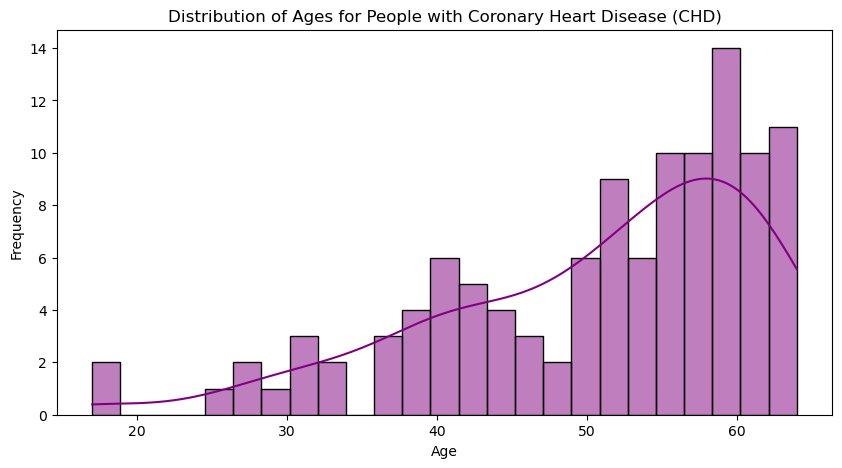

In [29]:

import matplotlib.pyplot as plt
import seaborn as sns

coronary_heart_disease_data = df[df['chd'] == 1]

plt.figure(figsize=(10, 5))
sns.histplot(coronary_heart_disease_data['age'], bins=25,kde=True , color='purple')

plt.title('Distribution of Ages for People with Coronary Heart Disease (CHD)', fontsize=12)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.show()


3.7 Age groups whose survival rate is the largest

- create age bins to group by range 
- label the range 
- new column for the age group
- calculate the survival rate for each range of age 
- Plot graph against Survival rate and age group 

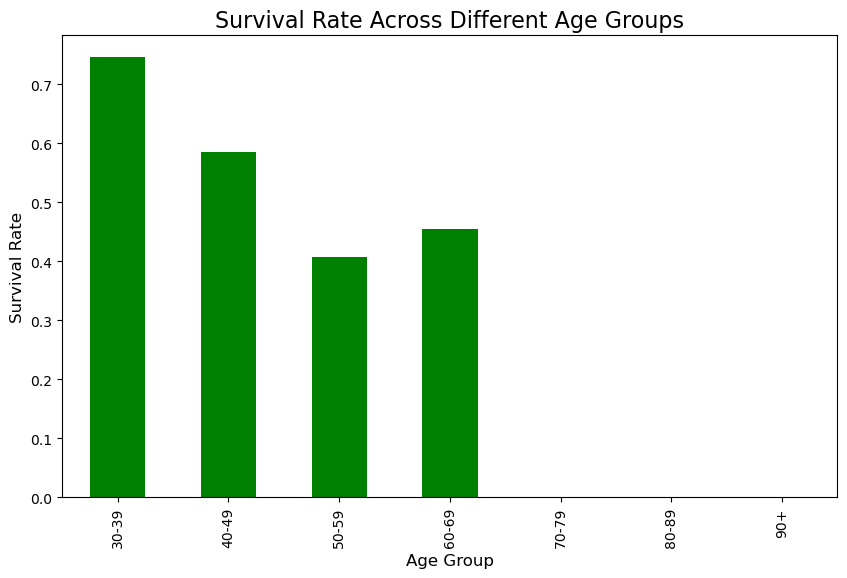

In [34]:

import matplotlib.pyplot as plt

bins = [29, 39, 49, 59, 69, 79, 89, 100]  
labels = ['30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

survival_rate = df[df['chd'] == 0].groupby('age_group',observed=False).size() / df.groupby('age_group',observed=False).size()

plt.figure(figsize=(10, 6))
survival_rate.plot(kind='bar', color='green')

plt.title('Survival Rate Across Different Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)

plt.show()
